# Exercise 8:

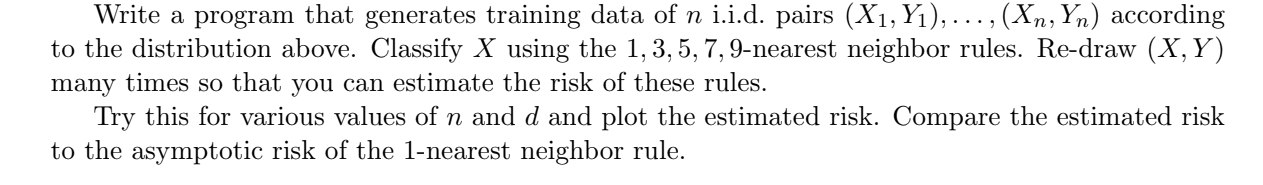

In [109]:
import numpy as np
import pandas as pd
from math import ceil
import itertools
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

## Functions:

In [110]:
def indic(num):
  if num >0:
    return 1
  else:
    return 0


def generate_points(n, d):

# 1. To generate 'n' observations of 'd' dimensions:
  df = pd.DataFrame(np.random.uniform(low=0, high=1.0, size=d)).transpose()
  df.columns = ["x{0}".format(i+1) for i in range(d)]  

  for i in range(n-1):
    df1 = pd.DataFrame(np.random.uniform(low=0, high=1.0, size=d)).transpose()
    df1.columns = ["x{0}".format(i+1) for i in range(d)]  
    df = df.append(df1, ignore_index=True)

  df["mean_x"] = sum(df[i] for i in df.columns)/len(df.columns)
  df["draw"] = np.random.uniform(low=0, high=1.0, size = n)
  df["y"] = df["mean_x"]-df["draw"]

  df["y"] = df["y"].apply(indic)

  df = df.drop(["mean_x", "draw"], axis =1)

  plt.scatter(df["x1"], df["x2"])
  plt.title("First two dim")

# 2. To find the neareast neighbors of the observations:

  # a. Compute pairwise distances:
  distances = pdist(df.drop(["y"], axis = 1), 'euclidean')

  # b. Arrange into matrix:
  dist_matrix = pd.DataFrame(squareform(distances))

  # c. Create columns with the nearest neighbors:
  closest_1 = []
  closest_2 = []
  closest_3 = []
  closest_4 = []
  closest_5 = []
  closest_6 = []
  closest_7 = []
  closest_8 = []
  closest_9 = []

  for i in range(dist_matrix.shape[0]):
    closest_1.append(dist_matrix.iloc[:][i].sort_values().reset_index()["index"][1])
    closest_2.append(dist_matrix.iloc[:][i].sort_values().reset_index()["index"][2])
    closest_3.append(dist_matrix.iloc[:][i].sort_values().reset_index()["index"][3])
    closest_4.append(dist_matrix.iloc[:][i].sort_values().reset_index()["index"][4])
    closest_5.append(dist_matrix.iloc[:][i].sort_values().reset_index()["index"][5])
    closest_6.append(dist_matrix.iloc[:][i].sort_values().reset_index()["index"][6])
    closest_7.append(dist_matrix.iloc[:][i].sort_values().reset_index()["index"][7])
    closest_8.append(dist_matrix.iloc[:][i].sort_values().reset_index()["index"][8])
    closest_9.append(dist_matrix.iloc[:][i].sort_values().reset_index()["index"][9])

  df["1st_nn"] = closest_1
  df["2nd_nn"] = closest_2
  df["3rd_nn"] = closest_3
  df["4th_nn"] = closest_4
  df["5th_nn"] = closest_5
  df["6th_nn"] = closest_6
  df["7th_nn"] = closest_7
  df["8th_nn"] = closest_8
  df["9th_nn"] = closest_9


# 3. To classify using nearest neighbors rules:

  class_1_nn = []
  for i in range(len(df["y"])):
    class_1_nn.append(df["y"].iloc[df["1st_nn"].iloc[i]]) 

  class_3_nn = []
  for i in range(len(df["y"])):
    class_3_nn.append(float(round((df["y"].iloc[df["1st_nn"].iloc[i]]+df["y"].iloc[df["2nd_nn"].iloc[i]]+df["y"].iloc[df["3rd_nn"].iloc[i]])/3))) 

  class_5_nn = []
  for i in range(len(df["y"])):
    class_5_nn.append(float(round((df["y"].iloc[df["1st_nn"].iloc[i]]+df["y"].iloc[df["2nd_nn"].iloc[i]]+df["y"].iloc[df["3rd_nn"].iloc[i]]
                            +df["y"].iloc[df["4th_nn"].iloc[i]]+df["y"].iloc[df["5th_nn"].iloc[i]])/5))) 

  class_7_nn = []
  for i in range(len(df["y"])):
    class_7_nn.append(float(round((df["y"].iloc[df["1st_nn"].iloc[i]]+df["y"].iloc[df["2nd_nn"].iloc[i]]+df["y"].iloc[df["3rd_nn"].iloc[i]]
                            +df["y"].iloc[df["4th_nn"].iloc[i]]+df["y"].iloc[df["5th_nn"].iloc[i]]
                            +df["y"].iloc[df["6th_nn"].iloc[i]]+df["y"].iloc[df["7th_nn"].iloc[i]])/7))) 

  class_9_nn = []
  for i in range(len(df["y"])):
    class_9_nn.append(float(round((df["y"].iloc[df["1st_nn"].iloc[i]]+df["y"].iloc[df["2nd_nn"].iloc[i]]+df["y"].iloc[df["3rd_nn"].iloc[i]]
                            +df["y"].iloc[df["4th_nn"].iloc[i]]+df["y"].iloc[df["5th_nn"].iloc[i]]
                            +df["y"].iloc[df["6th_nn"].iloc[i]]+df["y"].iloc[df["7th_nn"].iloc[i]]
                            +df["y"].iloc[df["8th_nn"].iloc[i]]+df["y"].iloc[df["9th_nn"].iloc[i]])/9))) 

  df["class_1_nn"] = class_1_nn
  df["class_3_nn"] = class_3_nn
  df["class_5_nn"] = class_5_nn
  df["class_7_nn"] = class_7_nn
  df["class_9_nn"] = class_9_nn

  return df

def compute_error(df, k):
  if k == 1:
    error = sum(df.apply(lambda row: abs(row.y - row.class_1_nn), axis=1))
  
  elif k == 3:
    error = sum(df.apply(lambda row: abs(row.y - row.class_3_nn), axis=1))
  
  elif k == 5:
    error = sum(df.apply(lambda row: abs(row.y - row.class_5_nn), axis=1))

  elif k == 7:
    error = sum(df.apply(lambda row: abs(row.y - row.class_7_nn), axis=1))

  elif k == 9:
    error = sum(df.apply(lambda row: abs(row.y - row.class_9_nn), axis=1))
  
  else:
    pass
  return error/(df.shape[0])


,x1,x2,y,1st_nn,2nd_nn,3rd_nn,4th_nn,5th_nn,6th_nn,7th_nn,8th_nn,9th_nn,class_1_nn,class_3_nn,class_5_nn,class_7_nn,class_9_nn
0,0.026038,0.684700,0,2,1,5,3,4,7,9,8,6,0,0.0,0.0,1.0,1.0
1,0.066479,0.416032,0,5,0,2,4,3,9,7,8,6,1,0.0,0.0,1.0,1.0
2,0.215098,0.803285,0,0,1,3,5,7,6,4,9,8,0,0.0,0.0,1.0,1.0
3,0.577073,0.541138,0,7,8,5,9,2,1,6,0,4,1,1.0,1.0,1.0,1.0
4,0.265578,0.038570,1,5,9,1,3,8,0,2,7,6,1,1.0,0.0,0.0,0.0
5,0.270939,0.303685,1,1,4,9,3,0,2,8,7,6,0,1.0,0.0,0.0,0.0
6,0.947376,0.967820,1,7,3,8,2,5,9,0,1,4,1,0.0,0.0,0.0,0.0
7,0.756862,0.767118,1,6,3,8,2,5,9,0,1,4,1,0.0,0.0,0.0,0.0
8,0.863521,0.343911,0,3,9,7,5,6,4,2,1,0,0,1.0,1.0,1.0,1.0
9,0.539589,0.102270,1,4,5,8,3,1,7,2,0,6,1,1.0,0.0,0.0,0.0


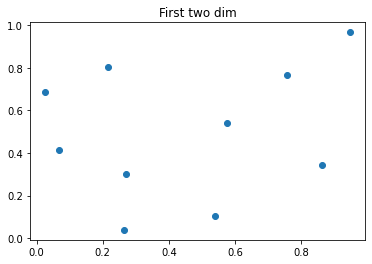

In [111]:
df = generate_points(10, 2)
df


## Run 30 experiments for many different 'n' and 'd':

,m,n,d,k,error
0,0.0,10.0,2.0,1.0,0.30
1,0.0,10.0,2.0,3.0,0.50
2,0.0,10.0,2.0,5.0,0.50
3,0.0,10.0,2.0,7.0,0.30
4,0.0,10.0,2.0,9.0,0.10
...,...,...,...,...,...
4195,29.0,100.0,100.0,1.0,0.53
4196,29.0,100.0,100.0,3.0,0.47
4197,29.0,100.0,100.0,5.0,0.50
4198,29.0,100.0,100.0,7.0,0.52


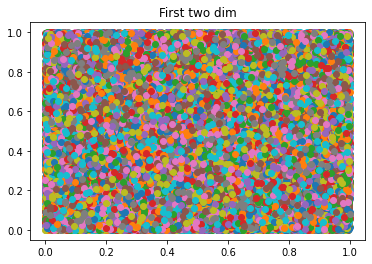

In [112]:
def run_exps(m, n, d, k):
  results = pd.DataFrame(columns = ["m","n", "d", "k", "error"])
  for exp in range(m):
    for little_n in n:
      for little_d in d:
        for little_k in k:
          results.loc[len(results)] = [exp, little_n, little_d, little_k, compute_error(generate_points(little_n, little_d), little_k)]
  
  return results

table = run_exps(30, [10, 20, 50, 100], [2, 4, 6, 8, 10, 50, 100], [1, 3, 5, 7, 9])
table


In [136]:
means = pd.DataFrame(columns = ["n", "d", "k", "error"])
for n in [10, 20, 50, 100]:
  for d in [2, 4, 6, 8, 10, 50, 100]: 
    for k in [1, 3, 5, 7, 9]:
      means.loc[len(means)] = [n, d, k, table[(table["n"] == n) & (table["d"] == d) & (table["k"] == k)]["error"].mean()]

## Results!

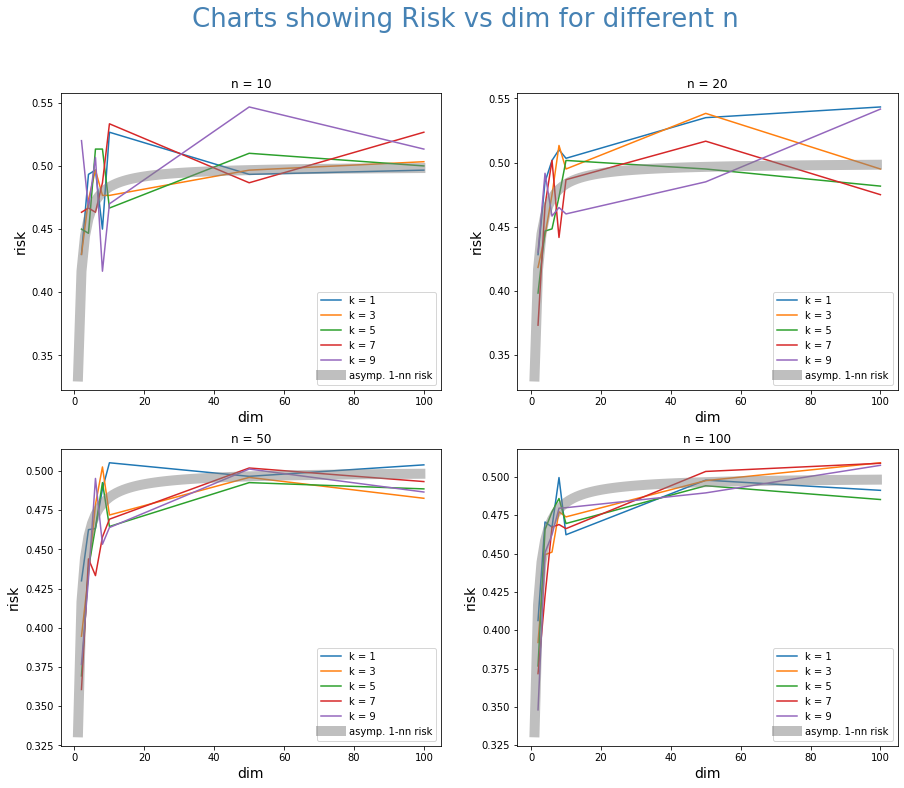

In [142]:
fig, ax = plt.subplots(2, 2, figsize=(15,12))

fig.suptitle('Charts showing Risk vs dim for different n', fontsize=26, color = "steelblue")

for k in [1, 3, 5, 7, 9]:
  ax[0,0].plot(means[(means["n"] == 10) & (means["k"] == k)]["d"], means[(means["n"] == 10) & (means["k"] == k)]["error"], label = "k = {}".format(k))

for k in [1, 3, 5, 7, 9]:
  ax[0, 1].plot(means[(means["n"] == 20) & (means["k"] == k)]["d"], means[(means["n"] == 20) & (means["k"] == k)]["error"], label = "k = {}".format(k))

for k in [1, 3, 5, 7, 9]:
  ax[1, 0].plot(means[(means["n"] == 50) & (means["k"] == k)]["d"], means[(means["n"] == 50) & (means["k"] == k)]["error"], label = "k = {}".format(k))

for k in [1, 3, 5, 7, 9]:
  ax[1, 1].plot(means[(means["n"] == 100) & (means["k"] == k)]["d"], means[(means["n"] == 100) & (means["k"] == k)]["error"], label = "k = {}".format(k))

ax[0, 0].set_title(label = 'n = 10')
ax[0, 1].set_title(label = 'n = 20')
ax[1, 0].set_title(label = 'n = 50')
ax[1, 1].set_title(label = 'n = 100')


asymp = pd.DataFrame(columns = ["d", "R_1nn"])
d = list(range(1, 100))
asymp["d"] = d

def risk_1nn(num):
  return 0.5 - 1/(6*num)

asymp["R_1nn"] = asymp["d"].apply(risk_1nn)


for i in [0, 1]:
  for j in [0, 1]:
    ax[i, j].set_xlabel('dim', fontsize = 14)
    ax[i, j].set_ylabel('risk', fontsize = 14)
    ax[i, j].plot(asymp["d"], asymp["R_1nn"], linewidth=10, color = "gray", label="asymp. 1-nn risk", alpha = 0.5)
    ax[i, j].legend()
    

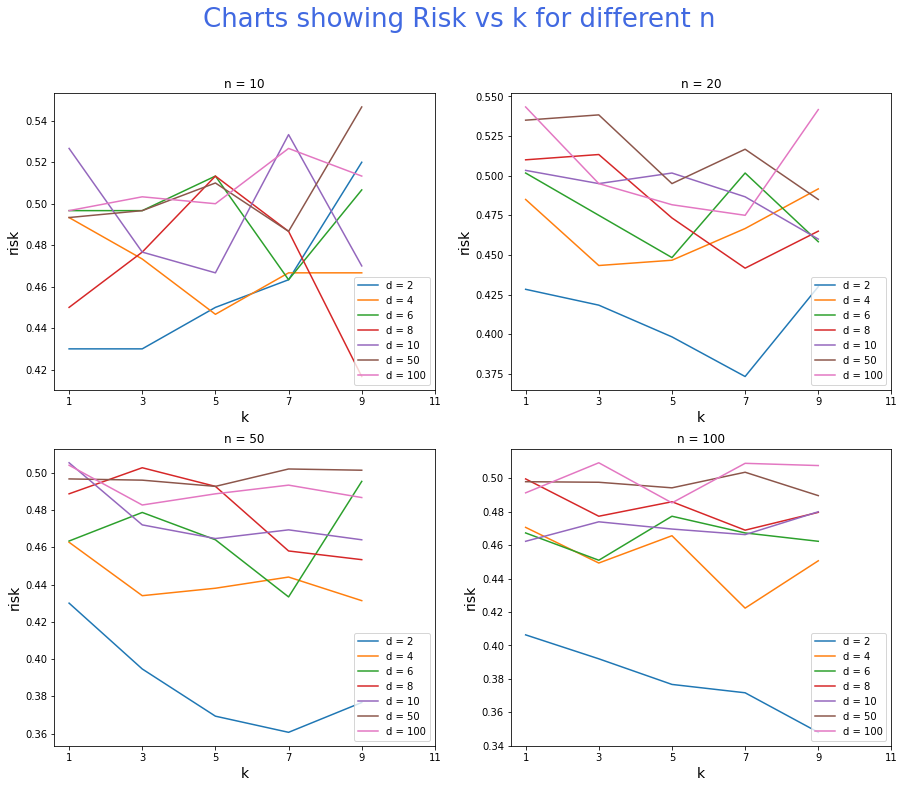

In [143]:
fig, ax = plt.subplots(2, 2, figsize=(15,12))

fig.suptitle('Charts showing Risk vs k for different n', fontsize=26, color = "royalblue")

for d in [2, 4, 6, 8, 10, 50, 100]:
  ax[0,0].plot(means[(means["n"] == 10) & (means["d"] == d)]["k"], means[(means["n"] == 10) & (means["d"] == d)]["error"], label = "d = {}".format(d))

for d in [2, 4, 6, 8, 10, 50, 100]:
  ax[0, 1].plot(means[(means["n"] == 20) & (means["d"] == d)]["k"], means[(means["n"] == 20) & (means["d"] == d)]["error"], label = "d = {}".format(d))

for d in [2, 4, 6, 8, 10, 50, 100]:
  ax[1, 0].plot(means[(means["n"] == 50) & (means["d"] == d)]["k"], means[(means["n"] == 50) & (means["d"] == d)]["error"], label = "d = {}".format(d))

for d in [2, 4, 6, 8, 10, 50, 100]:
  ax[1, 1].plot(means[(means["n"] == 100) & (means["d"] == d)]["k"], means[(means["n"] == 100) & (means["d"] == d)]["error"], label = "d = {}".format(d))

ax[0, 0].set_title(label = 'n = 10')
ax[0, 1].set_title(label = 'n = 20')
ax[1, 0].set_title(label = 'n = 50')
ax[1, 1].set_title(label = 'n = 100')

for i in [0, 1]:
  for j in [0, 1]:
    ax[i, j].set_xlabel('k', fontsize = 14)
    ax[i, j].set_ylabel('risk', fontsize = 14)
    ax[i, j].legend(loc = "lower right")
    ax[i, j].set_xticks(range(1, 13, 2))

##Conclusions:
Analysing the Risk vs Dimensions and the Risk vs K charts, I observe that:

- The higher n, the smoother the pattern.
- The classifiers, for this range of values, tend to the asymptotic risk of 1-nn (gray curve).
- The higher the dimension, the more the risk tends to 0.5.
- The lower the dimension, the lower the risk, as expected.
- As k increases, the risk tends to lower, for this range of values.
